In [5]:
from pathlib import Path

from java_migration.analysis.utils import (MavenStatus, get_experiment_data,
                                           get_maven_logs,
                                           visualize_agent_trace)

In [6]:
experiment_path = Path(
    # "/Users/mayvic/Documents/git/java-migration-paper/data/experiments/2025-03-09/22-19-56-hopeful-wescoff"
    # "/Users/mayvic/Documents/git/java-migration-paper/data/experiments/2025-03-11/13-55-09-condescending-galileo"
    # "/Users/mayvic/Documents/git/java-migration-paper/data/experiments/2025-03-11/14-14-38-awesome-pasteur"
    # "/Users/mayvic/Documents/git/java-migration-paper/data/experiments/2025-03-11/15-14-25-loving-newton"
    # "/Users/mayvic/Documents/git/java-migration-paper/data/experiments/2025-03-11/16-15-09-tender-varahamihira"
    "/home/user/java-migration-paper/data/experiments/2025-03-13/18-28-16-boring-kowalevski"
)
exp_data = get_experiment_data(experiment_path)

In [7]:
maven_logs = {repo_name: get_maven_logs(exp_data[repo_name]) for repo_name in exp_data}
repo_names = list(exp_data.keys())
maven_logs[repo_names[1]]

[{'step': 4, 'status': <MavenStatus.GOAL_ERROR: 7>},
 {'step': 9, 'status': <MavenStatus.GOAL_ERROR: 7>},
 {'step': 12, 'status': <MavenStatus.SUCCESS: 3>}]

In [10]:
maven_statuses_by_repo = {
    status: len(
        [repo_name for repo_name in maven_logs if any(status == step["status"] for step in maven_logs[repo_name])]
    )
    for status in MavenStatus
}
dict(sorted(maven_statuses_by_repo.items(), key=lambda item: item[1]))

{<MavenStatus.NO_MAVEN: 0>: 0,
 <MavenStatus.UNKNOWN_ERROR: 5>: 0,
 <MavenStatus.PLUGIN_RESOLVE_ERROR: 8>: 1,
 <MavenStatus.SKIPPED_TESTS: 10>: 1,
 <MavenStatus.DEPENDENCY_ERROR: 4>: 2,
 <MavenStatus.UNKNOWN: 6>: 2,
 <MavenStatus.SUCCESS: 3>: 4,
 <MavenStatus.GOAL_ERROR: 7>: 5,
 <MavenStatus.INVALID_POM: 9>: 5,
 <MavenStatus.COMPILE_ERROR: 1>: 6,
 <MavenStatus.TESTS_STARTED: 2>: 7}

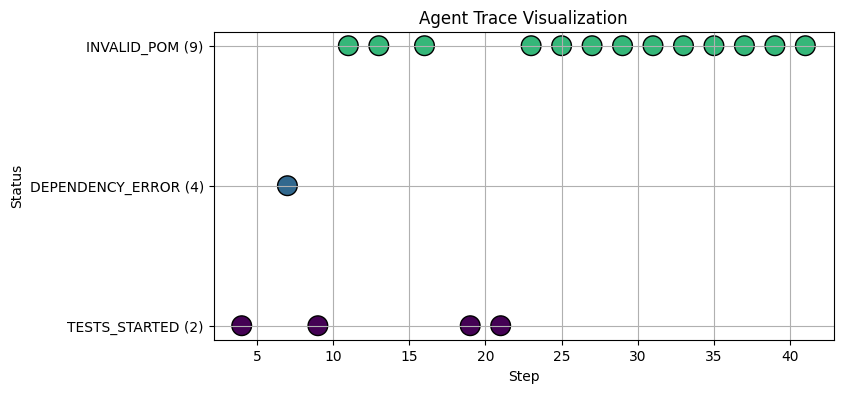

In [13]:
# print(exp_data[repo_names[12]]["agent_log"].steps[15].execution_logs)
visualize_agent_trace(maven_logs["opengoofy/hippo4j"])
# print(repo_names[12])